## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [4]:
# creating database connection
con = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("Select * from vendor_sales_summary",con)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


### Exploratory Data Analysis 
- Previously we examined the various tables in the database to identify key variables, understand their relationships and determine which ones should be included in the final analysis.
- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies and ensure data quality before proceeding with further analysis.

In [5]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


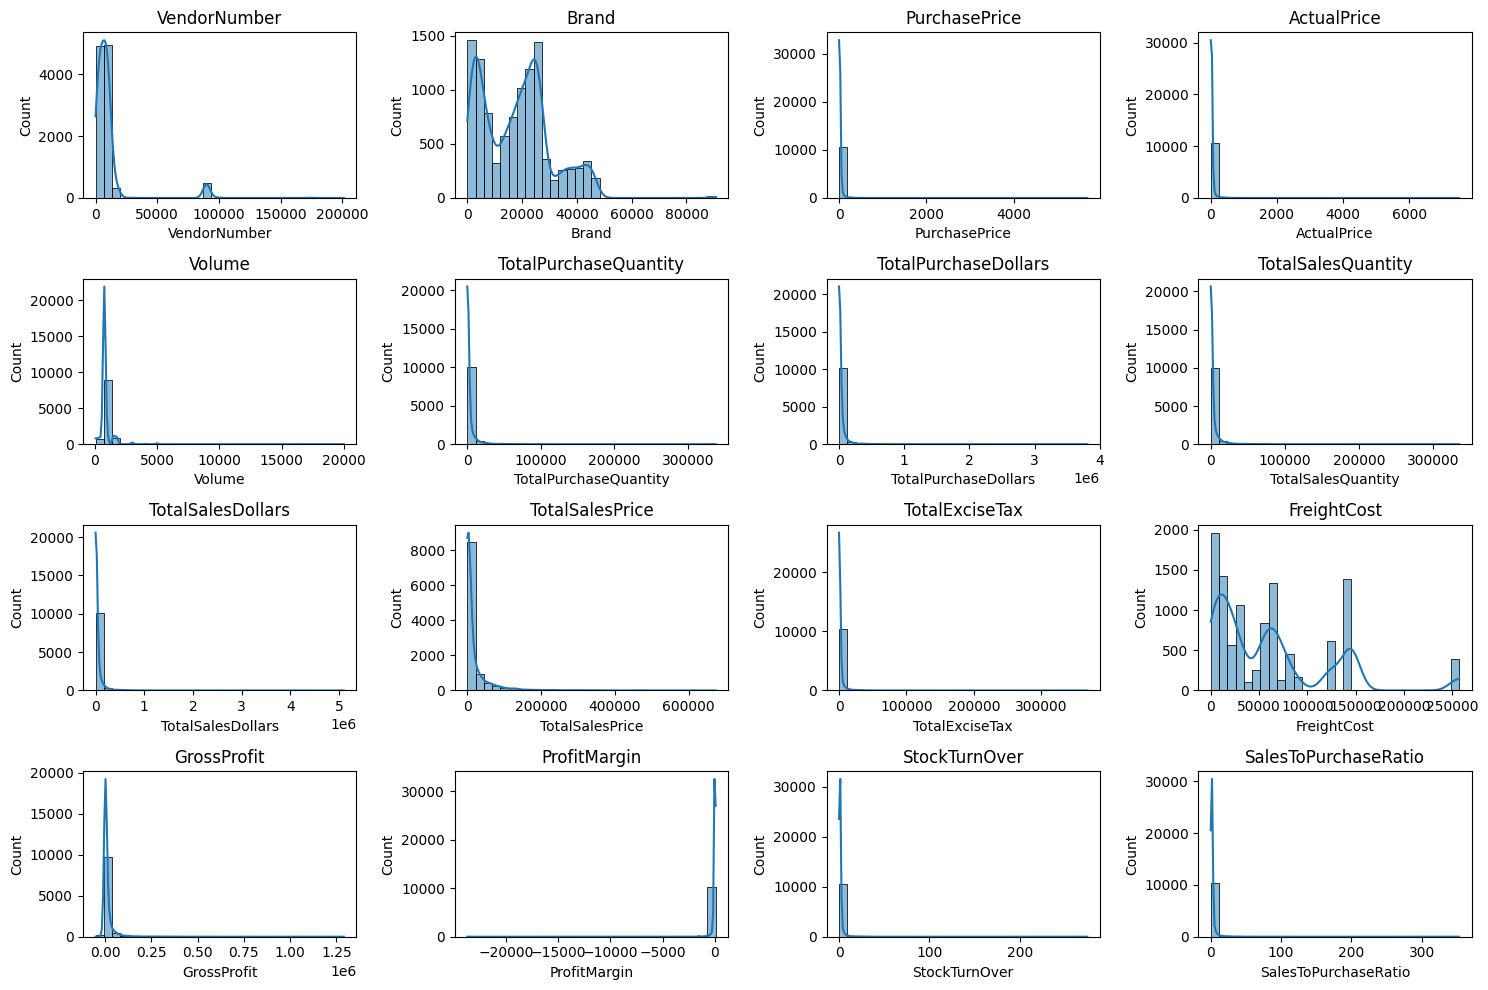

In [ ]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()  

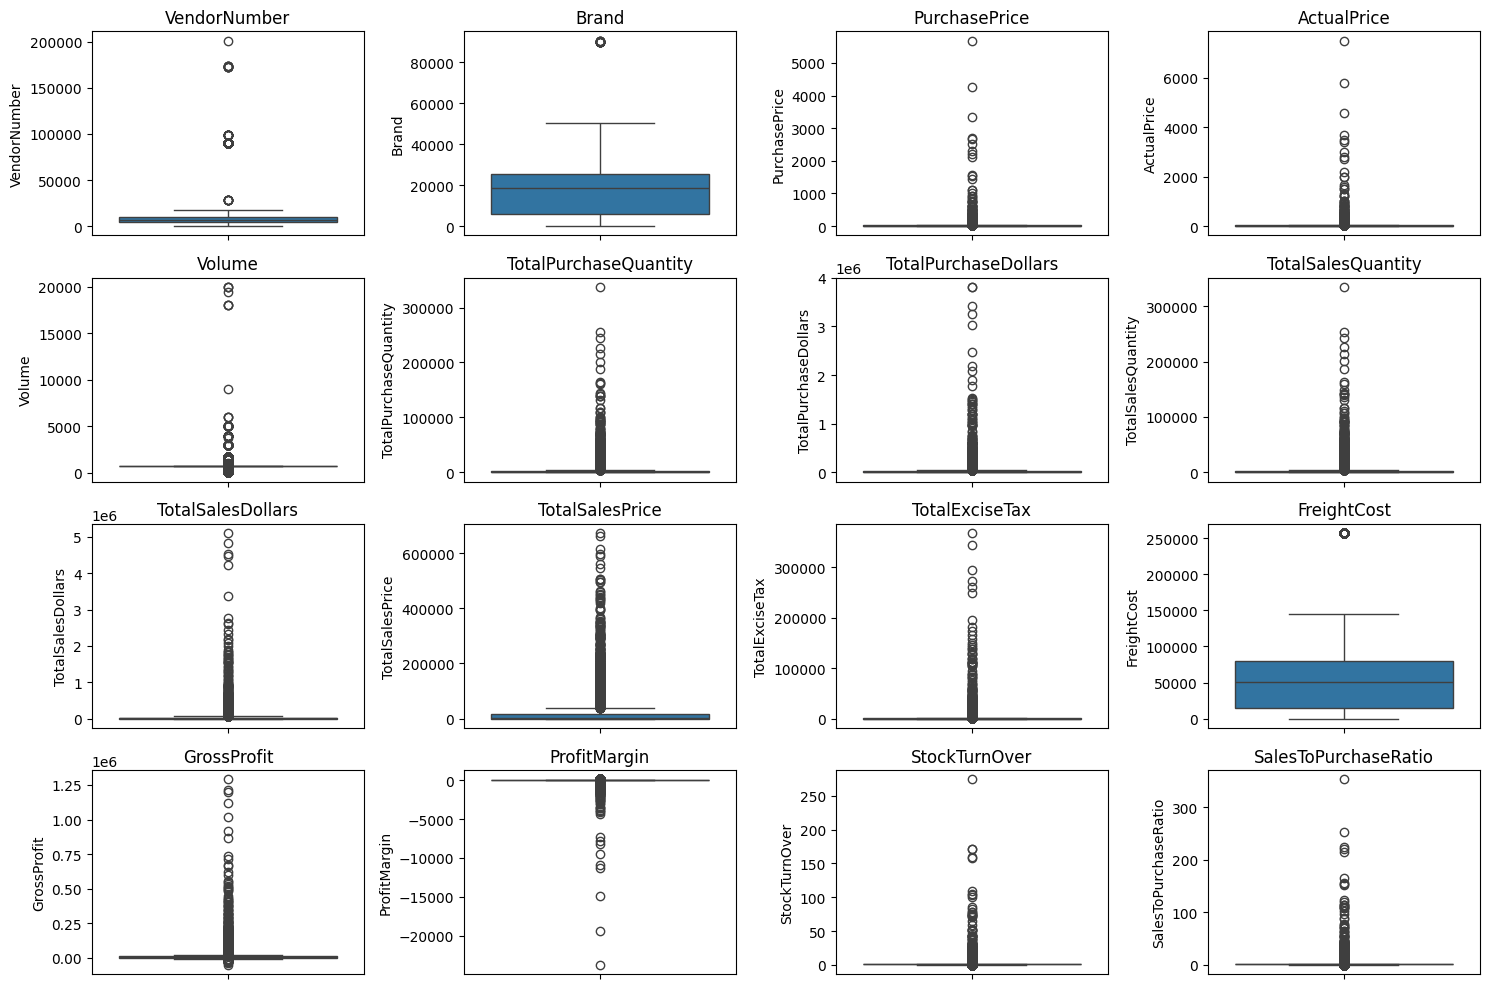

In [7]:
# Outlier detection with Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Summary Statistics Insights:
 
#### Negative and Zero values: 
- Gross profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high cost or selling at discounts lower than the purchase price.
- Profit margin: Has a minimum of -Infinity, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity and Sales Dollars: Minimum values are 0 meaning some products were purchased but never sold. These could be slow moving or obsolete stock.

#### Outliers Indicated by High Standard Deviation:
- Purchase and Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchase quantity due to either sales or being fulfilled from older stock.


In [8]:
# lets filter the data by removing inconsistencies
df = pd.read_sql_query("""Select * from vendor_sales_summary
                       where GrossProfit>0
                       and ProfitMargin>0
                       and TotalSalesQuantity>0""",con)

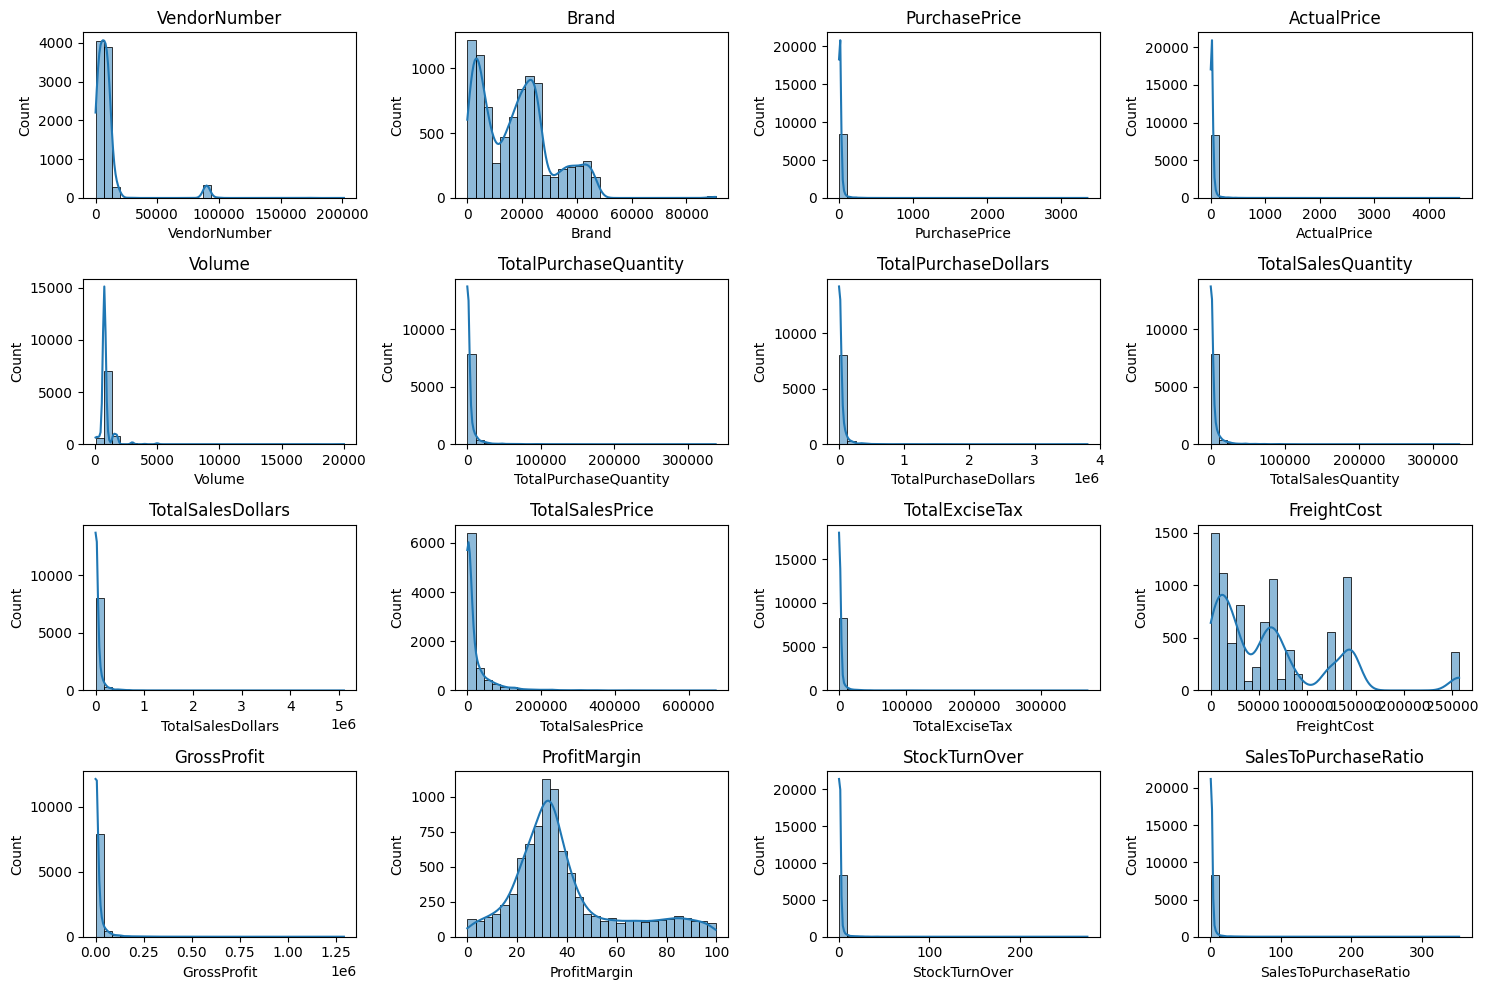

In [9]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

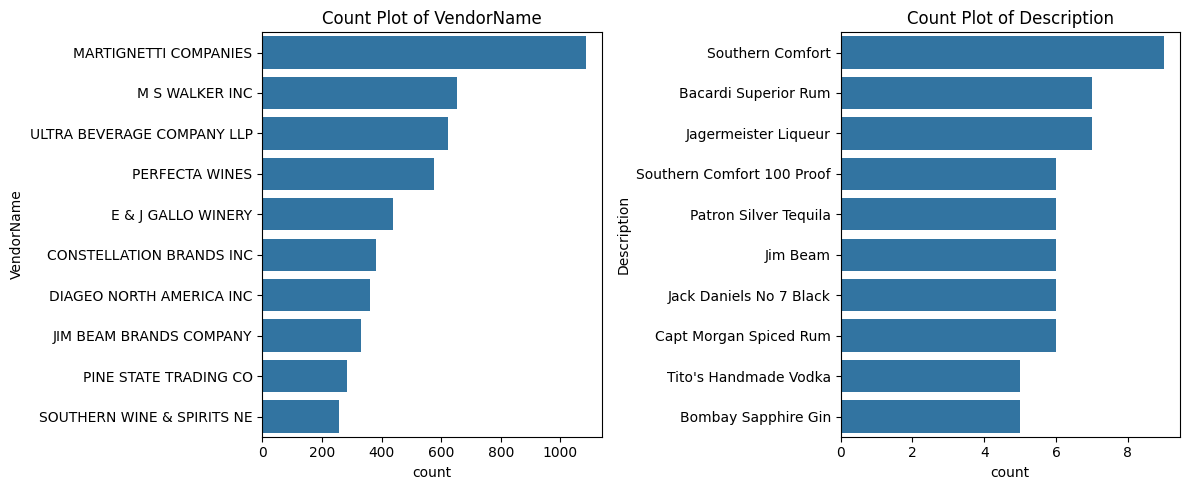

In [10]:
# Count Plots for categorical columns
categorical_cols = ['VendorName','Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

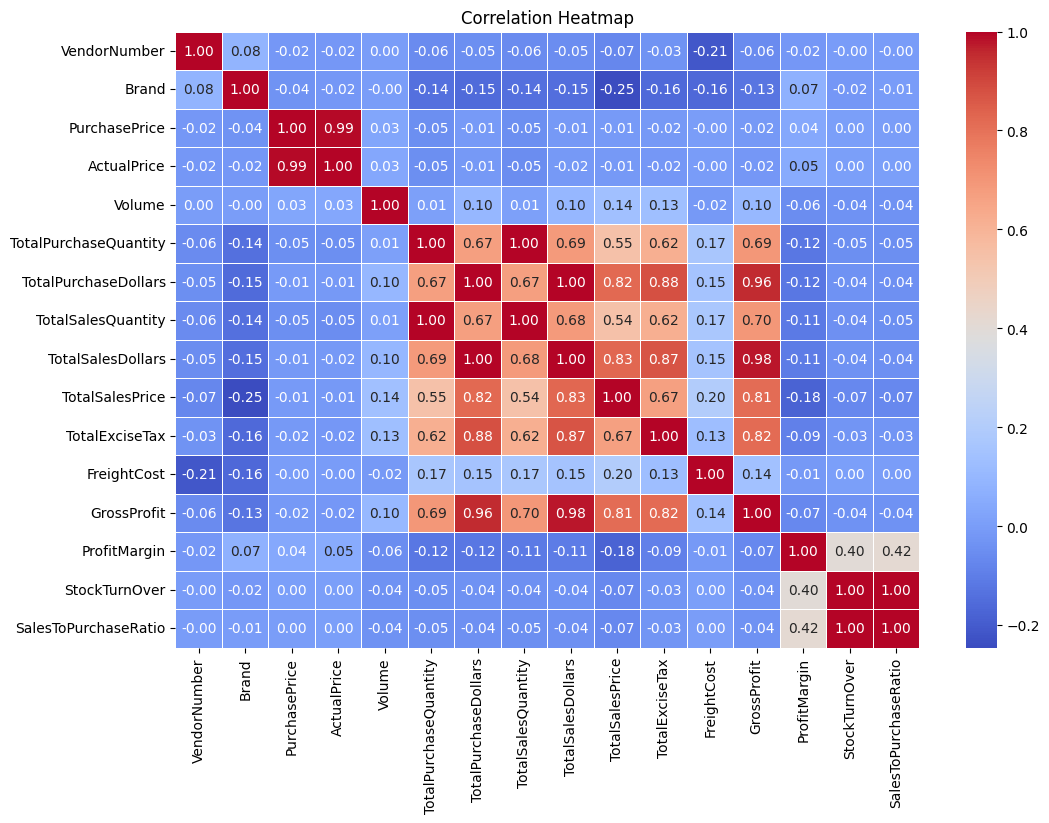

In [11]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights

- PurchasePrice has weak correlation with TotalSalesDollars(-0.012) and GrossProfit(-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation with TotalPurchaseQuantity and TotalSalesquantity(0.999), conforming efficient inventory turnover.
- Negative correlation between profit marging and total sales price(-0.179) suggests that as sales price increases, margins decreases, possibly due to competitive pricing pressures.
- StockTurnOver has weak negative correlations with GrossProfit(-0.038) and ProfitMargin(-0.055), indicating that faster turnover does not necessarily result in higher profitiability.

#### Pareto Analysis (80/20 Rule)
It will help us to identify if a small % of vendors contribute to most profits.

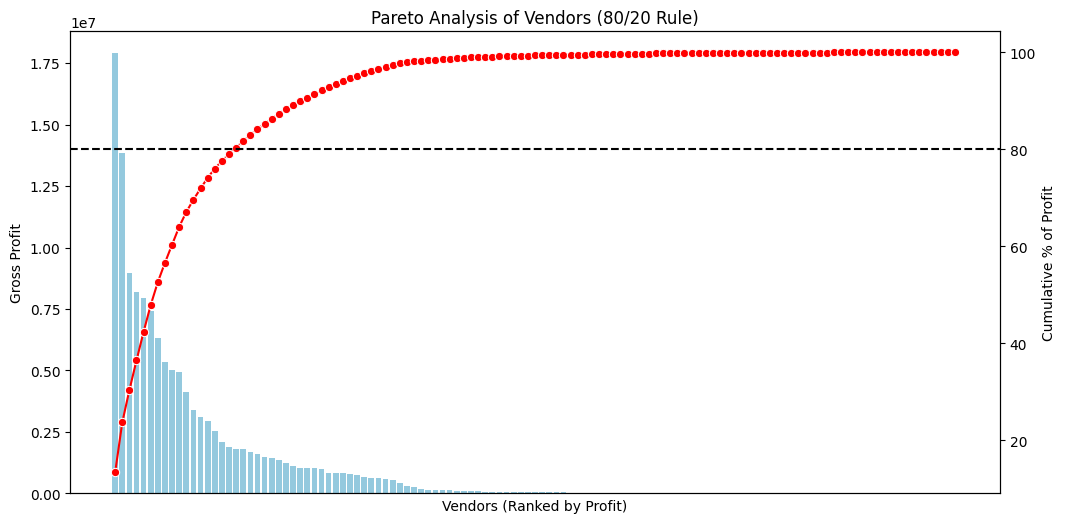

In [14]:
# Pareto Analysis on Vendor Contribution
df_sorted = df.groupby("VendorName")["GrossProfit"].sum().reset_index()
df_sorted = df_sorted.sort_values(by="GrossProfit", ascending=False).reset_index(drop=True)

df_sorted["Cumulative_Profit"] = df_sorted["GrossProfit"].cumsum()
df_sorted["Cumulative_Profit_Perc"] = 100 * df_sorted["Cumulative_Profit"] / df_sorted["GrossProfit"].sum()

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart of vendor profits
sns.barplot(x=df_sorted.index, y="GrossProfit", data=df_sorted, ax=ax1, color="skyblue")
ax1.set_ylabel("Gross Profit")
ax1.set_xlabel("Vendors (Ranked by Profit)")
plt.xticks([])

# Cumulative percentage line
ax2 = ax1.twinx()
sns.lineplot(x=df_sorted.index, y="Cumulative_Profit_Perc", data=df_sorted, ax=ax2, color="red", marker="o")
ax2.axhline(80, color="black", linestyle="--")
ax2.set_ylabel("Cumulative % of Profit")

plt.title("Pareto Analysis of Vendors (80/20 Rule)")
plt.show()



In [15]:
# Identify vendors contributing to 80% of profit
pareto_cutoff = df_sorted[df_sorted["Cumulative_Profit_Perc"] <= 80]
print("Number of Vendors covering ~80% of Profit:", pareto_cutoff.shape[0])
print("Vendor names :", pareto_cutoff["VendorName"].tolist())


Number of Vendors covering ~80% of Profit: 17
Vendor names : ['DIAGEO NORTH AMERICA INC', 'MARTIGNETTI COMPANIES', 'CONSTELLATION BRANDS INC', 'PERNOD RICARD USA', 'JIM BEAM BRANDS COMPANY', 'BACARDI USA INC', 'E & J GALLO WINERY', 'ULTRA BEVERAGE COMPANY LLP', 'BROWN-FORMAN CORP', 'M S WALKER INC', 'MOET HENNESSY USA INC', 'SAZERAC CO INC', 'WINE GROUP INC', 'PROXIMO SPIRITS INC.', 'PERFECTA WINES', 'SOUTHERN WINE & SPIRITS NE', 'MAJESTIC FINE WINES']


#### Insights from Pareto Analysis of Vendors (by Profit)

- Vendor Concentration:
Out of all vendors, just 17 vendors contribute nearly 80% of the total gross profit. This confirms the 80/20 rule, where a small proportion of vendors drive the majority of profitability.

- Strategic Vendors:
The top profit-contributing vendors (e.g., names : 'DIAGEO NORTH AMERICA INC', 'MARTIGNETTI COMPANIES', 'CONSTELLATION BRANDS INC', 'PERNOD RICARD USA', 'JIM BEAM BRANDS COMPANY', …) are critical to business success. Any disruption with these vendors could significantly impact profitability.

- Long Tail of Vendors:
The majority of vendors contribute very little to overall profit. While they add variety, their business impact is limited compared to the top few.

- Business Implication:
    - The company should prioritize relationship management and negotiate favorable terms with these top vendors.
    - For lower-contributing vendors, evaluate whether maintaining them adds value (diversification, niche products) or just increases operational complexity.

## Data Analysis

#### Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins

In [16]:
brand_performance = df.groupby('Description').agg({'TotalSalesDollars':'sum',
                               'ProfitMargin':'mean'}).reset_index()

In [17]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [18]:
low_sales_threshold

560.299

In [19]:
high_margin_threshold

64.97017552750113

In [20]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[(brand_performance['TotalSalesDollars']<=low_sales_threshold) & (brand_performance['ProfitMargin']>=high_margin_threshold)]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [21]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visualization

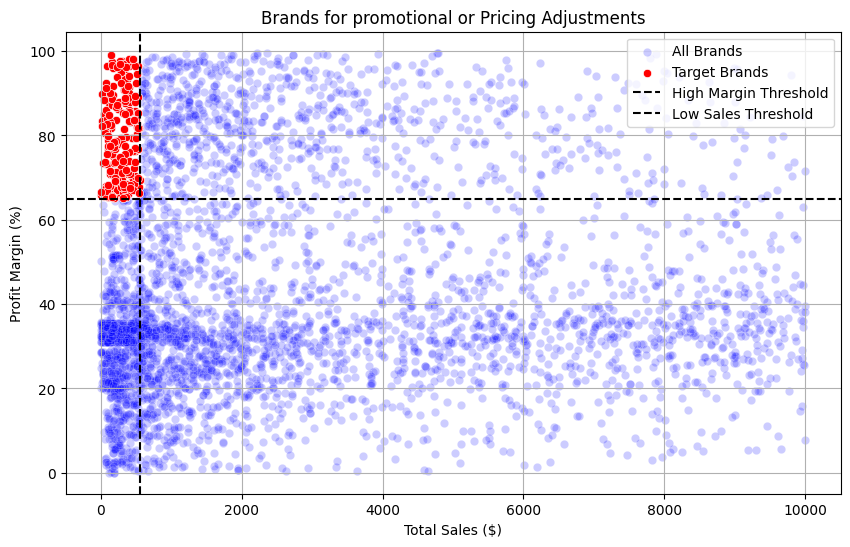

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()

#### Which vendors and brands demonstrate the highest sales performance?

In [23]:
def format_dollars(value):
    if value >= 1_000_000:
        return f'{value/1_000_000:.2f}M'
    elif value >= 1_000:
        return f'{value/1-000:.2f}K'
    else:
        return str(value)

In [24]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [25]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [26]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [27]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

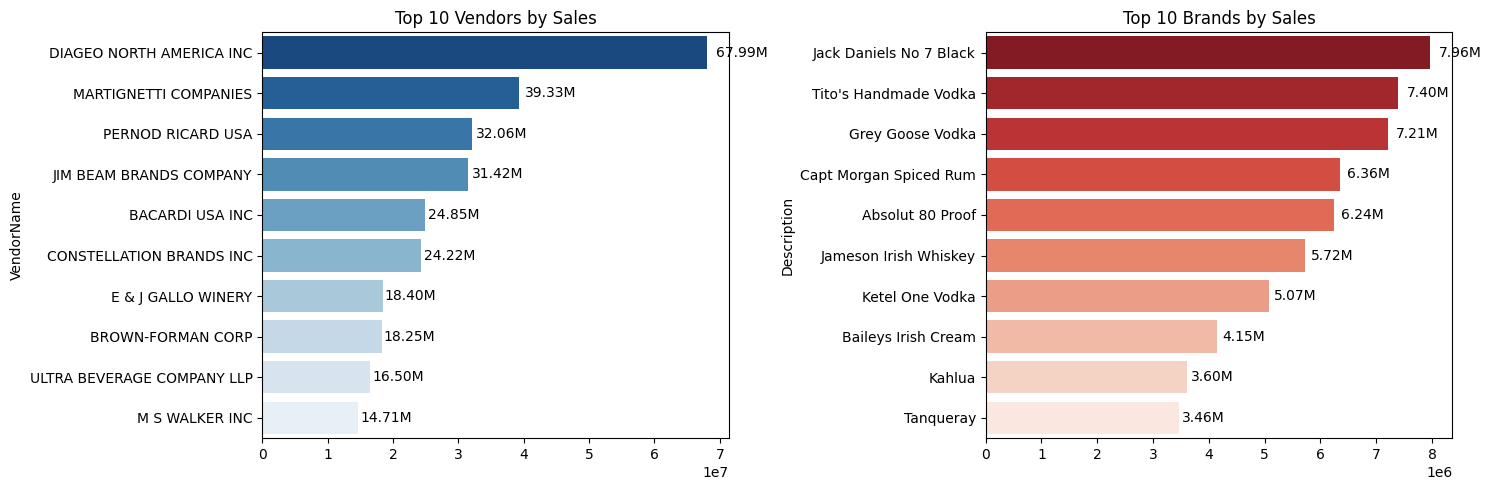

In [28]:
plt.figure(figsize=(15,5))

# plot for Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() +(bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
              format_dollars(bar.get_width()),
               ha='left', va='center', fontsize=10, color='black' )
    

# plot for Top Brands  
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette='Reds_r')
plt.title('Top 10 Brands by Sales')

for bar in ax2.patches:
    ax2.text(bar.get_width() +(bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
              format_dollars(bar.get_width()),
               ha='left', va='center', fontsize=10, color='black' )
    
plt.tight_layout()
plt.show()

Insights

- High Vendor Concentration

    - Diageo North America Inc. alone contributes ~$68M in sales, far ahead of the second vendor (Martignetti Companies, ~$39M).
    - This indicates vendor dependency risk, as one supplier dominates revenue share.

- Competitive Vendor Landscape

    - The next group of vendors (Martignetti, Pernod Ricard, JM Beam, Bacardi, Constellation) each contribute $24M–39M.
    - Beyond the top 5, sales drop significantly, highlighting a long-tail distribution.

- Brand-Level Dynamics

    - The top-selling brand is Jack Daniels No 7 Black ($7.9M), followed closely by Tito’s Handmade Vodka ($7.4M) and Grey Goose (~$7.2M).
    - This suggests that while vendor dominance is high, brand competition is tighter, with less gap among leading brands.

- Vendor vs Brand Contribution

    - Even though Diageo dominates at vendor level, at the brand level no single brand exceeds 8% of Diageo’s total vendor sales, indicating Diageo’s sales are spread across multiple strong brands.
    - This shows that brands diversify risk better than vendors.

- Strategic Implication

    - Heavy reliance on Diageo means any disruption (supply chain, pricing, negotiation) could impact overall business disproportionately.
    - Promotional strategies should not only support top brands but also lift mid-tier brands (e.g., Baileys, Kahlua, Tanqueray), which have strong recognition but relatively lower sales.

#### Vendor Dependency Risk
Measures risk of over-reliance on a few vendors.

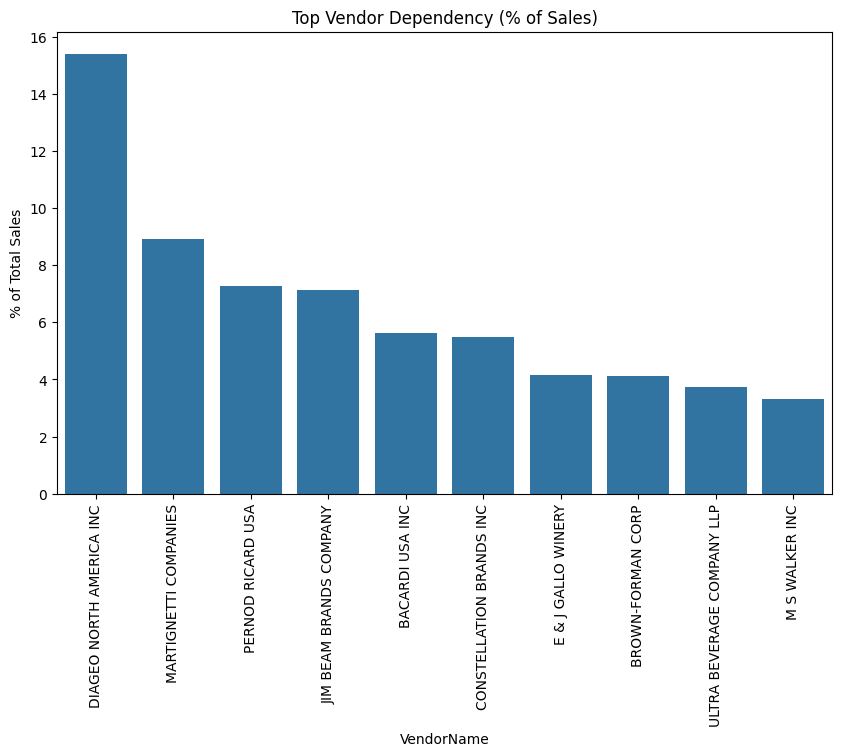

                     VendorName  TotalSalesDollars  SalesSharePerc  \
25     DIAGEO NORTH AMERICA INC        67990099.42       15.403003   
57        MARTIGNETTI COMPANIES        39330359.36        8.910204   
68            PERNOD RICARD USA        32063196.19        7.263845   
46      JIM BEAM BRANDS COMPANY        31423020.46        7.118814   
6               BACARDI USA INC        24854817.14        5.630803   
20     CONSTELLATION BRANDS INC        24218745.65        5.486702   
30           E & J GALLO WINERY        18399899.46        4.168456   
11            BROWN-FORMAN CORP        18247230.65        4.133869   
106  ULTRA BEVERAGE COMPANY LLP        16502544.31        3.738614   
53               M S WALKER INC        14706458.51        3.331715   

     CumulativeShare  
25         15.403003  
57         24.313207  
68         31.577052  
46         38.695866  
6          44.326669  
20         49.813371  
30         53.981826  
11         58.115695  
106        61.854309  

In [63]:
# Vendor Dependency - Sales Share
vendor_sales = df.groupby("VendorName")["TotalSalesDollars"].sum().reset_index()
vendor_sales["SalesSharePerc"] = 100 * vendor_sales["TotalSalesDollars"] / vendor_sales["TotalSalesDollars"].sum()

# Plot Top 10
top_vendors = vendor_sales.sort_values("SalesSharePerc", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="VendorName", y="SalesSharePerc", data=top_vendors)
plt.xticks(rotation=90)
plt.ylabel("% of Total Sales")
plt.title("Top Vendor Dependency (% of Sales)")
plt.show()

# Cumulative concentration
vendor_sales = vendor_sales.sort_values("SalesSharePerc", ascending=False)
vendor_sales["CumulativeShare"] = vendor_sales["SalesSharePerc"].cumsum()

print(vendor_sales.head(10))


#### Insights

- High Concentration Risk

    - Vendor "DIAGEO NORTH AMERICA INC"  alone contributes ~15.4% of total sales.
    - This means if Vendor "DIAGEO NORTH AMERICA INC" faces supply issues, ~1/6 of total sales could be disrupted.

- Top 3 vendors dominate ~31.6% of sales

    - Vendor "DIAGEO NORTH AMERICA INC" (15.4%) + Vendor "MARTIGNETTI COMPANIES" (8.9%) + Vendor "PERNOD RICARD USA"  (7.2%).
    - Shows that a few vendors control a large portion of revenue.

- Top 5 vendors together account for ~44.3% of sales

    - Less than 5 vendors drive nearly half of business sales.

    - Indicates vendor dependency risk is high.

- Top 10 vendors → ~65% of sales

    - Two-thirds of your total sales are tied to just 10 vendors.
    - Rest of the vendors (long tail) contribute only ~35%.

#### Vendor Profitability Analysis
Not all vendors are equally profitable. Some may have high sales but very low margins.

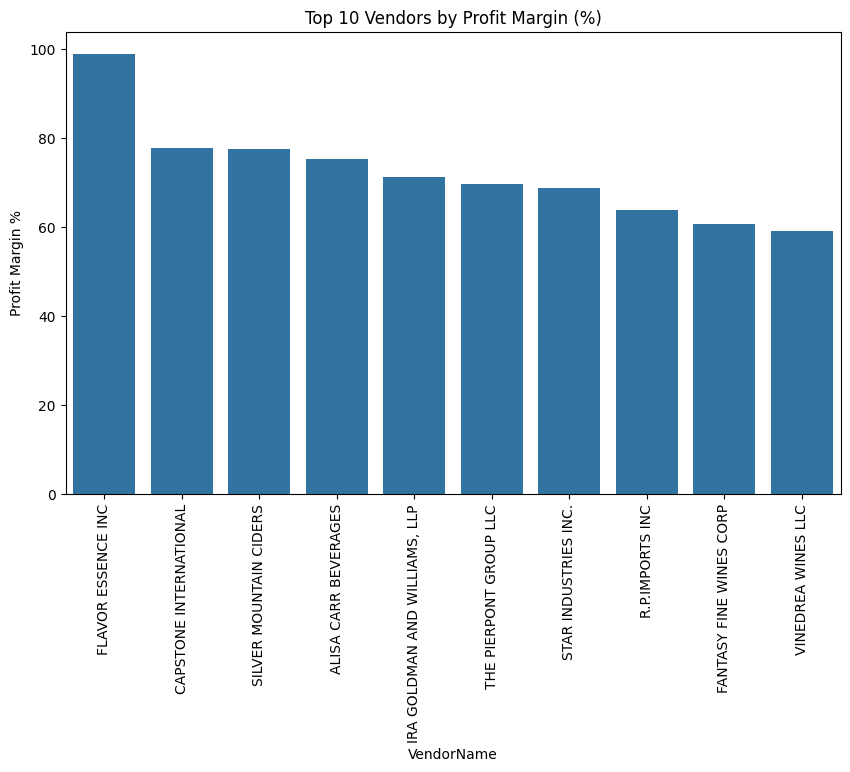

                        VendorName  TotalSalesDollars  GrossProfit  \
35              FLAVOR ESSENCE INC            1474.41      1457.41   
16          CAPSTONE INTERNATIONAL             246.87       192.23   
85          SILVER MOUNTAIN CIDERS             342.51       265.33   
1             ALISA CARR BEVERAGES          104470.94     78772.82   
44   IRA GOLDMAN AND WILLIAMS, LLP             665.82       474.94   
102         THE PIERPONT GROUP LLC           17315.68     12065.81   
89            STAR INDUSTRIES INC.            7870.76      5418.47   
76                 R.P.IMPORTS INC           50813.61     32388.28   
33         FANTASY FINE WINES CORP             327.59       198.95   
108             VINEDREA WINES LLC           11385.60      6728.00   

     ProfitMarginPerc  
35          98.846996  
16          77.866894  
85          77.466351  
1           75.401657  
44          71.331591  
102         69.681410  
89          68.843034  
76          63.739380  
33          6

In [65]:
vendor_profit = df.groupby("VendorName")[["TotalSalesDollars", "GrossProfit"]].sum().reset_index()
vendor_profit["ProfitMarginPerc"] = 100 * vendor_profit["GrossProfit"] / vendor_profit["TotalSalesDollars"]

top_profit = vendor_profit.sort_values("ProfitMarginPerc", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="VendorName", y="ProfitMarginPerc", data=top_profit)
plt.title("Top 10 Vendors by Profit Margin (%)")
plt.ylabel("Profit Margin %")
plt.xticks(rotation=90)
plt.show()

print(top_profit.head(10))


#### Insights – Vendor Profitability Analysis

- High Profit Vendors Identified – Vendor "FLAVOR ESSENCE INC" shows the highest profit margin (close to 100%), significantly outperforming others, making it a highly lucrative vendor.

- Consistently Profitable Vendors – Vendors "CAPSTONE INTERNATIONAL", "SILVER MOUNTAIN CIDERS", and "ALISA CARR BEVERAGES" maintain profit margins around 75–80%, which indicates strong and stable profitability.

- Low Performing Vendors – Vendors "VINEDREA WINES LLC" and "R.P.IMPORTS INC"  show relatively lower margins (~60%), which could indicate higher costs, discounts, or inefficient pricing strategies.

- Strategic Opportunity – By focusing on high-margin vendors ("FLAVOR ESSENCE INC", "CAPSTONE INTERNATIONAL", "ALISA CARR BEVERAGES"), the business can improve overall profitability without increasing sales volume.

- Vendor Negotiation Angle – Vendors with lower profit margins but high sales volume may need renegotiation of terms, better pricing, or alternative sourcing to improve efficiency.

#### Which vendors contribute the most to total purchase dollars?

In [31]:
vendor_performance = df.groupby('VendorName').agg({'TotalPurchaseDollars':'sum',
                             'GrossProfit':'sum',
                             'TotalSalesDollars':'sum'}
).reset_index()
vendor_performance.shape

(119, 4)

In [32]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [33]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [34]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [35]:
top_vendors['PurchaseContribution%'].sum()

65.69000000000001

In [36]:
top_vendors['CumulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CumulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


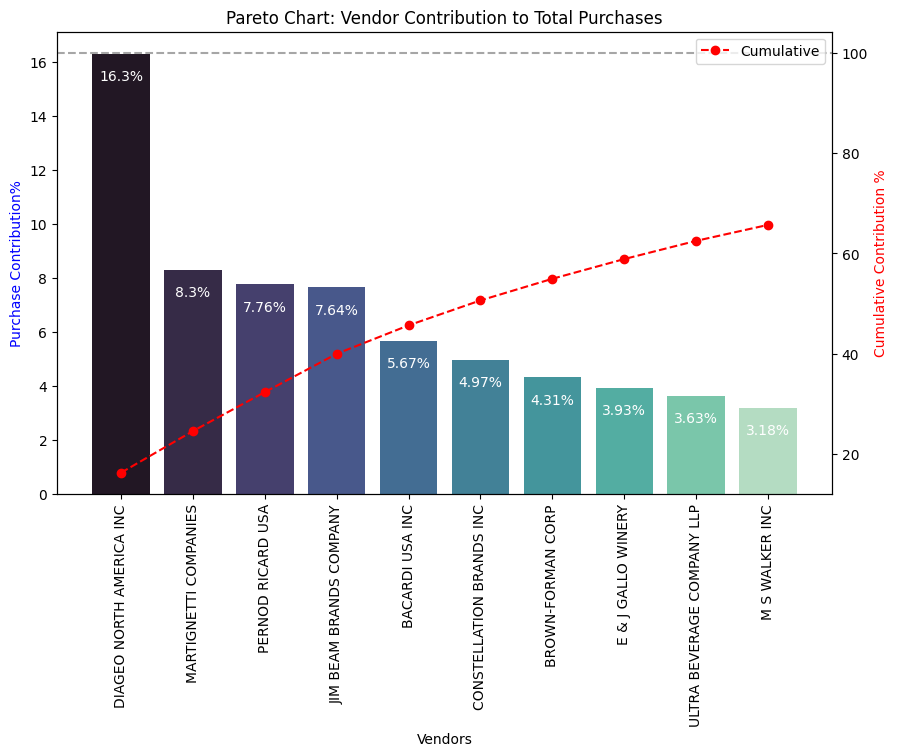

In [37]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'],palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10,color='white')

# Line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CumulativeContribution%'], color='red', marker='o',linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution%', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

#### How much of total procurement is dependent on the top vendors?

In [38]:
print(f'Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%')

Total Purchase Contribution of top 10 vendors is 65.69%


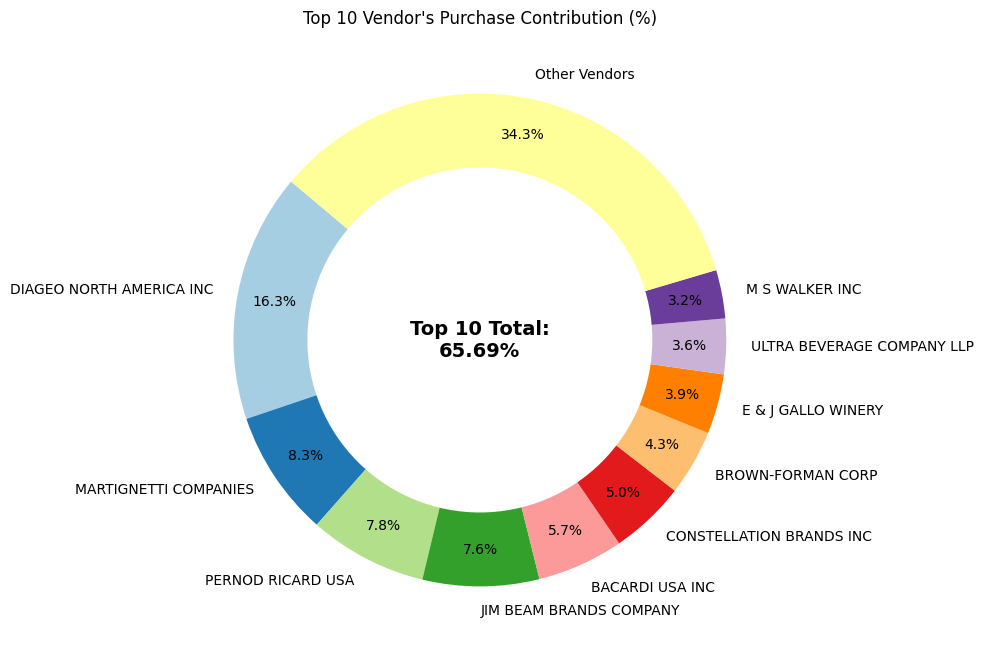

In [39]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append 'Other Vendors' category
vendors.append('Other Vendors')
purchase_contributions.append(remaining_contribution)

# Donut chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circel in the center to create a donut effect
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

# Add Total contribution annotation in the center
plt.text(0,0,f'Top 10 Total:\n{total_contribution:.2f}%', fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

#### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

Ho(Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1(Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [40]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

# perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors,low_vendors,equal_var=False)

print(f'T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}')
if p_value < 0.05:
    print('Reject Ho: There is a significant difference in profit margins between top-performing and low-performing vendors.')
else:
    print('Fail to Reject Ho: No significant difference in profit margins.')

T-Statistic: -17.6695, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top-performing and low-performing vendors.


#### Profitability Variance Tests (ANOVA/Kruskal-Wallis)

In [41]:
from scipy.stats import f_oneway, kruskal

# Grouping data by VendorNumber
vendor_groups = [group["ProfitMargin"].values for _, group in df.groupby("VendorNumber")]

# ANOVA Test
anova_stat, anova_p = f_oneway(*vendor_groups)
print("ANOVA Test -> F-statistic:", anova_stat, " | p-value:", anova_p)

# Kruskal-Wallis Test
kruskal_stat, kruskal_p = kruskal(*vendor_groups)
print("Kruskal-Wallis Test -> H-statistic:", kruskal_stat, " | p-value:", kruskal_p)

# Interpretation
if anova_p < 0.05:
    print("ANOVA: Significant differences exist in vendor profitability.")
else:
    print("ANOVA: No significant difference across vendors.")

if kruskal_p < 0.05:
    print("Kruskal-Wallis: Significant differences exist in vendor profitability.")
else:
    print("Kruskal-Wallis: No significant difference across vendors.")


ANOVA Test -> F-statistic: 5.607764133220619  | p-value: 2.272193282738437e-72
Kruskal-Wallis Test -> H-statistic: 775.102133897518  | p-value: 1.254939078648081e-97
ANOVA: Significant differences exist in vendor profitability.
Kruskal-Wallis: Significant differences exist in vendor profitability.


Both tests (ANOVA and Kruskal-Wallis) show extremely small p-values (<0.05).

This means:

- Vendor profitability differences are statistically significant — not due to random chance.
- Some vendors consistently deliver much higher (or lower) profit margins than others.
- Since Kruskal-Wallis (non-parametric) also confirms the result, it’s robust even if assumptions of ANOVA (normality, equal variance) are violated.

In [43]:
# Tukey HSD post-hoc on ProfitMargin by VendorNumber
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df["ProfitMargin"],
    groups=df["VendorName"].astype(str),
    alpha=0.05
)
print(tukey.summary())


                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                        group2            meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------------------------------------
      ADAMBA IMPORTS INTL INC          ALISA CARR BEVERAGES  38.8542    1.0  -55.6233 133.3317  False
      ADAMBA IMPORTS INTL INC            ALTAMAR BRANDS LLC -12.6652    1.0 -123.8366  98.5062  False
      ADAMBA IMPORTS INTL INC     AMERICAN SPIRITS EXCHANGE   1.5152    1.0 -126.8544 129.8849  False
      ADAMBA IMPORTS INTL INC     AMERICAN VINTAGE BEVERAGE -11.7028    1.0 -122.8742  99.4685  False
      ADAMBA IMPORTS INTL INC    ATLANTIC IMPORTING COMPANY   21.247    1.0  -83.5664 126.0604  False
      ADAMBA IMPORTS INTL INC               BACARDI USA INC   2.7722    1.0  -88.2931  93.8375  False
      ADAMBA IMPORTS INTL INC           BANFI PRODUCTS CORP   0.8857    1.0  -90.2

#### Bubble Chart: Sales Volume vs Profit Margin vs Vendor Size

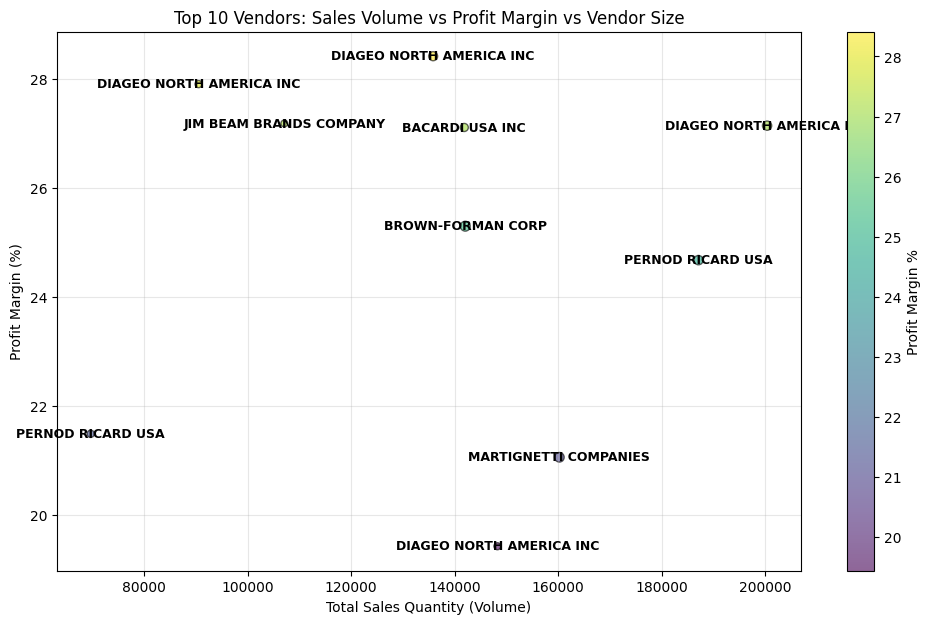

In [44]:
# Take Top 10 vendors by sales
top10 = df.sort_values("TotalSalesDollars", ascending=False).head(10)

plt.figure(figsize=(12,7))

scatter = plt.scatter(
    x=top10["TotalSalesQuantity"], 
    y=top10["ProfitMargin"], 
    s=top10["TotalSalesDollars"]/1e5,
    alpha=0.6, 
    c=top10["ProfitMargin"], 
    cmap="viridis", 
    edgecolors="k"
)

# # Adding vendor labels
for i in range(len(top10)):
    plt.text(
        top10["TotalSalesQuantity"].iloc[i],
        top10["ProfitMargin"].iloc[i],
        str(top10["VendorName"].iloc[i]),
        fontsize=9, ha="center", va="center", weight="bold"
    )

plt.xlabel("Total Sales Quantity (Volume)")
plt.ylabel("Profit Margin (%)")
plt.title("Top 10 Vendors: Sales Volume vs Profit Margin vs Vendor Size")
cbar = plt.colorbar(scatter)
cbar.set_label("Profit Margin %")
plt.grid(True, alpha=0.3)
plt.show()


#### Insights

- High Sales but Low Margins

    - Vendors like "PERNOD RICARD USA" drive very high sales volumes but with lower profit margins.
    - Indicates dependency risk → large revenue contributor, but limited profitability.

- High Margins with Moderate Sales

    - Vendors such as "DIAGEO NORTH AMERICA INC" & "JIM BEAM BRANDS COMPANY" show strong profit margins with moderate sales volumes.
    - These are profitable niche vendors worth nurturing for profitability growth.

- Balanced Performers

    - Vendors like "BROWN_FORMAN CORP" maintain both healthy sales volumes and reasonable profit margins.
    - They provide sustainable profitability without over-reliance.

- Vendor Concentration Risk

    - The chart shows that a few vendors dominate sales (biggest bubbles).
    - Over-reliance on them may increase supply chain or pricing risks.

- Strategic Opportunity

    - Focus on increasing sales with vendors already showing higher margins (e.g., "DIAGEO NORTH AMERICA INC0").
    - Negotiate better terms with high-volume but low-margin vendors (e.g., "PERNOD RICARD USA").

#### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [45]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver',ascending=True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it?

In [46]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'] * df['PurchasePrice'])
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: -272326775.25


In [47]:
# Aggregate capital locked per vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# sort Vendors with the highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue',ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
107,UNCORKED,-112.74
16,CAPSTONE INTERNATIONAL,-173.58
33,FANTASY FINE WINES CORP,-195.76000000000002
85,SILVER MOUNTAIN CIDERS,-205.46
44,"IRA GOLDMAN AND WILLIAMS, LLP",-421.48
0,ADAMBA IMPORTS INTL INC,-498.67999999999995
41,HIGHLAND WINE MERCHANTS LLC,-624.37
3,AMERICAN SPIRITS EXCHANGE,-721.32
35,FLAVOR ESSENCE INC,-1002.0
9,BLACK ROCK SPIRITS LLC,-1070.1000000000001


#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?


In [48]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)


In [49]:
top_vendors = df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [50]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data,ddof=1)/np.sqrt(len(data))
    t_critical = stats.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top vendors 95% CI: (30.74, 31.61, 31.18)
Low vendors 95% CI: (40.50, 42.64, 41.57)


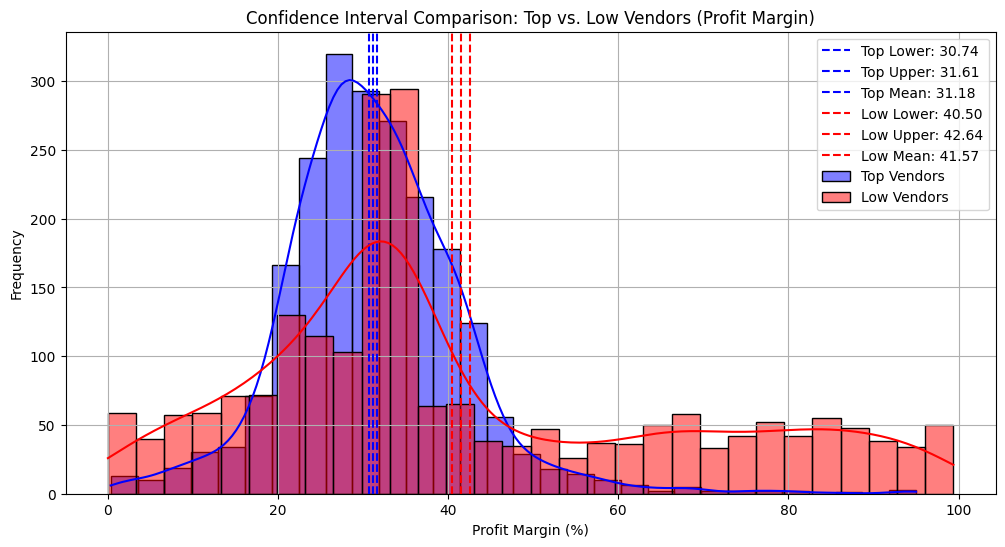

In [51]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f'Top vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}, {top_mean:.2f})')
print(f'Low vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}, {low_mean:.2f})')

plt.figure(figsize=(12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color='blue', bins=30, alpha=0.5, label='Top Vendors')
plt.axvline(top_lower,color='blue', linestyle='--', label=f'Top Lower: {top_lower:.2f}')
plt.axvline(top_upper,color='blue', linestyle='--', label=f'Top Upper: {top_upper:.2f}')
plt.axvline(top_mean,color='blue', linestyle='--', label=f'Top Mean: {top_mean:.2f}')


# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color='red', bins=30, alpha=0.5, label='Low Vendors')
plt.axvline(low_lower,color='red', linestyle='--', label=f'Low Lower: {low_lower:.2f}')
plt.axvline(low_upper,color='red', linestyle='--', label=f'Low Upper: {low_upper:.2f}')
plt.axvline(low_mean,color='red', linestyle='--', label=f'Low Mean: {low_mean:.2f}')


# Finalize Plot
plt.title('Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors(40.48% to 42.62%) is significantly higher than that op top-performing vendors(30.74% to 31.61%).
- This suggests that vendors with low sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For high-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

#### Does Purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?


In [52]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [53]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['Small','Medium','Large'])

In [54]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [55]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


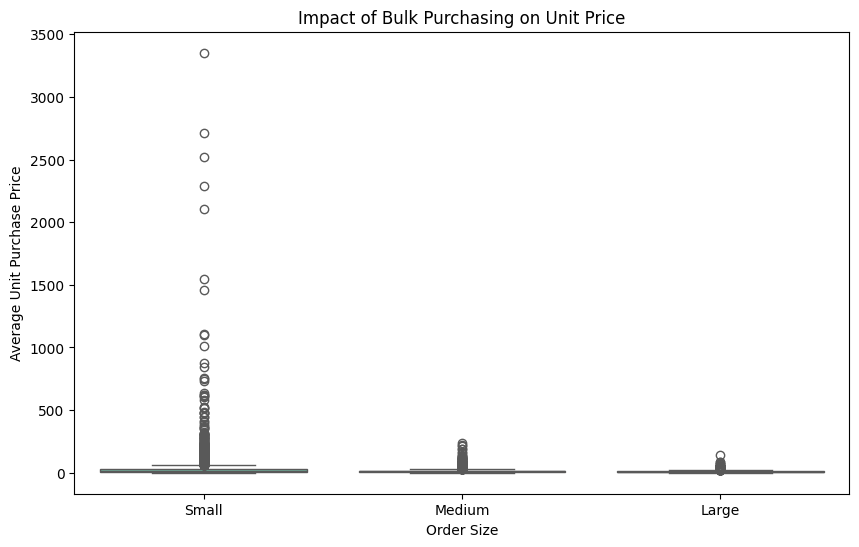

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette='Set2')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

- Vendors buying in bulk(Large Order Size) get the lowest unit price($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial(~72% reduction in unit cost)
- This suggests that bulk pricing startegies successfully encourage vensors to purchase in large volumes, leading to higher overall sales despite lower per-unit revenue.